## Decision Trees

In [56]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier # classificação de modelos de arvores
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
iris = load_iris()
x = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x, y)

DecisionTreeClassifier(max_depth=2)

In [58]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [59]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [60]:
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

[Text(0.4, 0.8333333333333334, 'x[1] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

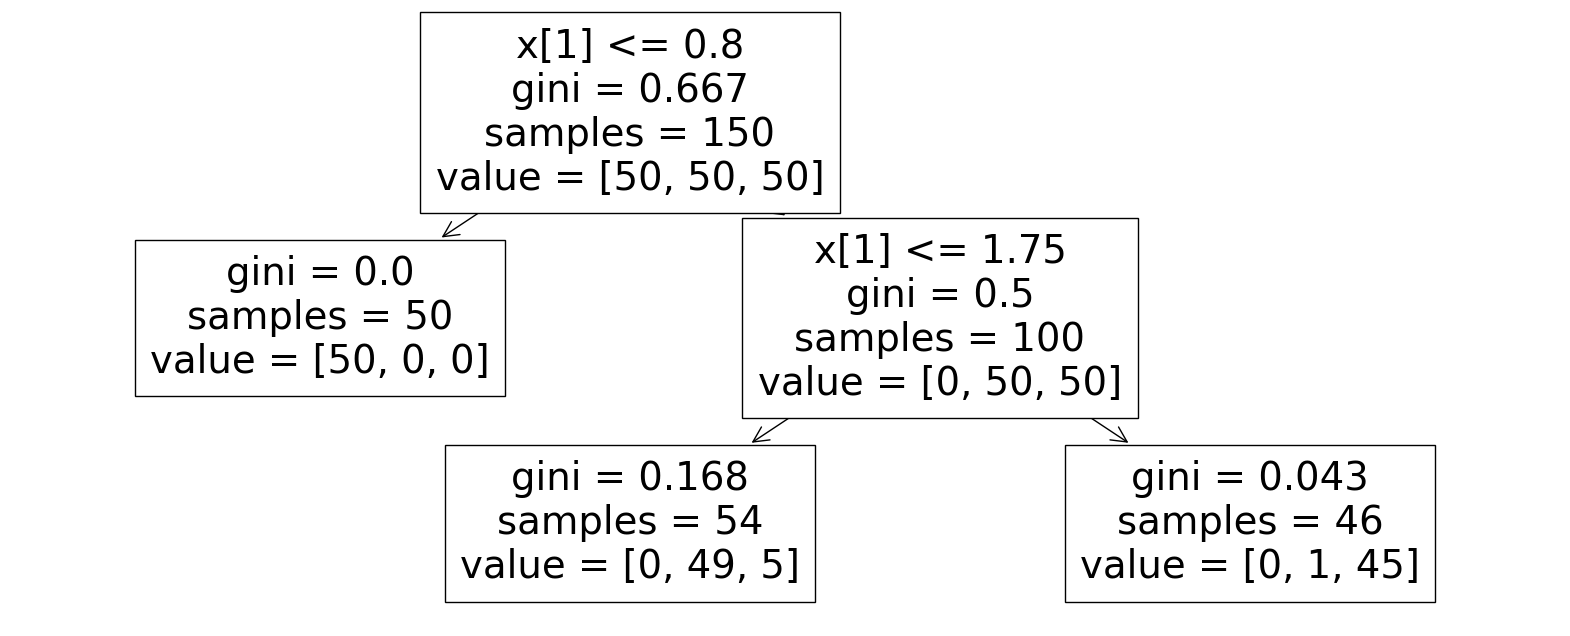

In [61]:
fig, ax = plt.subplots(figsize=(20, 8))
tree.plot_tree(tree_clf)

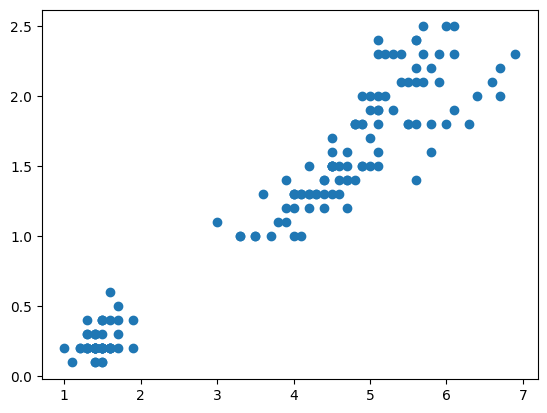

In [62]:
plt.scatter(x[:,0],x[:,1])

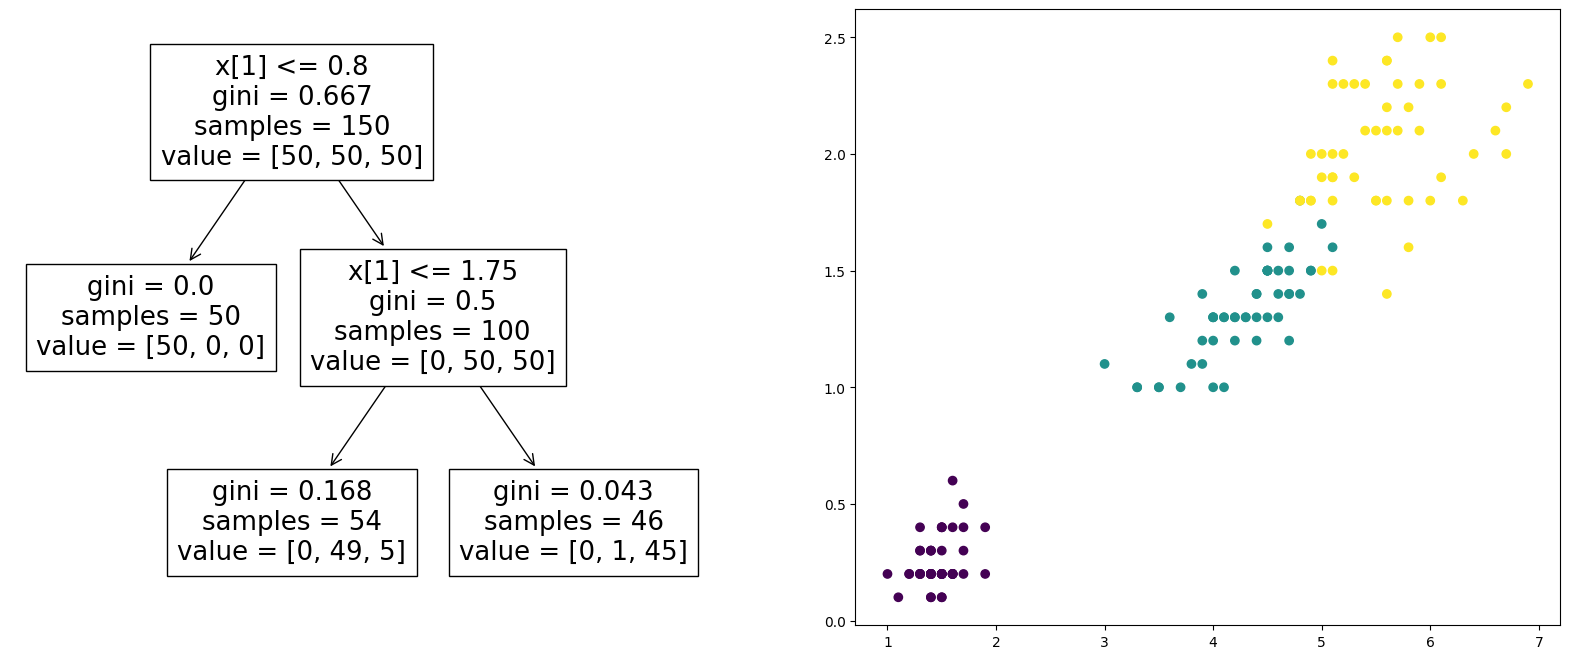

In [63]:
fig, ax = plt.subplots(1,2, figsize=(20, 8))
tree.plot_tree(tree_clf, ax=ax[0])
ax[1].scatter(x[:,0],x[:,1],c=y)

In [64]:
import numpy as np

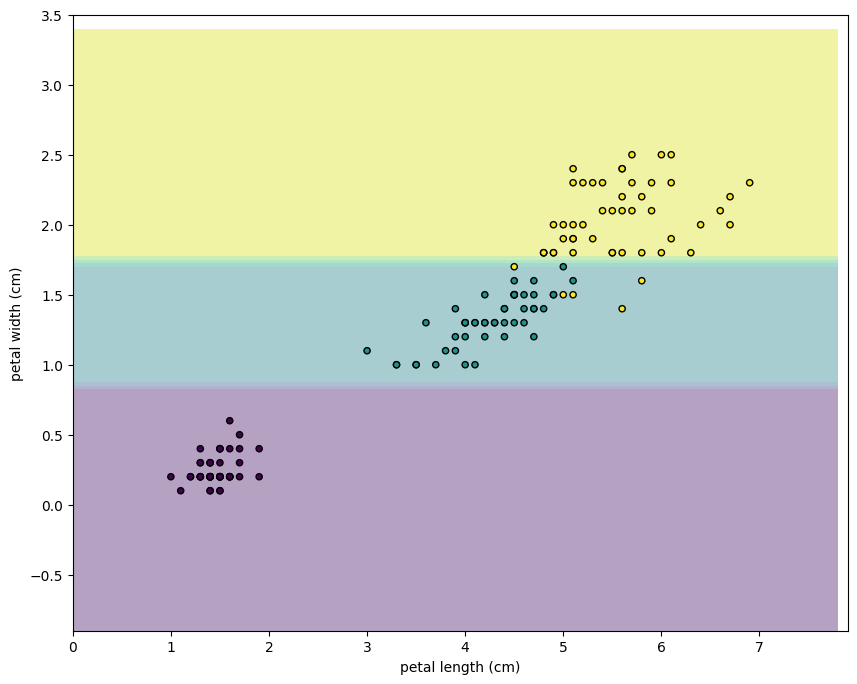

In [65]:
# Plotting decision regions
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor="k")

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel(iris["feature_names"][2])
ax.set_ylabel(iris["feature_names"][3])

plt.show()

### Overfitting em árvores de decisão

**o maior problema dos modelos de arvores de decisão**

In [66]:
from sklearn.datasets import make_blobs
# plt.style.use("seaborn-darkgrid")

x, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0, cluster_std=2)## dados fake para se treinar
# 100 amostras duas classes 2 features desvio padrão de 2 e random state (aleatoriedade)

In [67]:
x

array([[ 6.38173942,  3.57071956],
       [-0.23966978,  0.02202357],
       [-1.52932064,  5.85876804],
       [-0.79930142,  0.34219439],
       [ 4.43132711,  1.53154888],
       [ 1.90759496,  1.23129995],
       [ 1.06778711,  3.92941963],
       [ 5.90115157,  3.85869324],
       [ 0.20161644,  3.69918183],
       [ 0.44844819, -0.4814359 ],
       [ 0.28044578,  4.61648527],
       [ 1.31690385,  0.4189053 ],
       [ 1.39282003,  6.2570654 ],
       [-0.83832665,  4.40767812],
       [ 1.51926078,  2.50257645],
       [ 6.82155707,  2.78662263],
       [ 4.30853937, -1.26219936],
       [-0.36865082,  3.584681  ],
       [-0.5765473 , -0.02550555],
       [ 0.51543537,  1.97616204],
       [ 1.28616493,  5.06011237],
       [ 0.35316501,  4.41611801],
       [ 0.57614153,  3.98369285],
       [-1.3540296 ,  6.1054403 ],
       [ 3.10182084,  0.554571  ],
       [ 0.76983237,  5.12498433],
       [ 0.56575788, -0.75521342],
       [ 0.99727012,  7.87552832],
       [ 1.86399654,

In [68]:
y

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

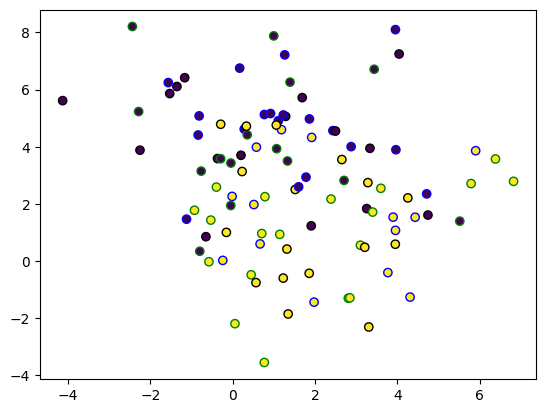

In [69]:
# plt.style.use("seaborn-dark-palette")
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors= ["green", "blue", "black"])

In [70]:
y

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [71]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2)
# tree_clf = DecisionTreeClassifier(max_depth=50)
tree_clf.fit(x,y)

DecisionTreeClassifier(max_depth=2)

In [72]:
x_min, x_max = x[:,0].min()-1,x[:,0].max()+1
y_min, y_max = x[:,1].min()-1,x[:,1].max()+1

In [73]:
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
# xx,yy = np.meshgrid(np.arange(x_min,x_max,0.5),np.arange(y_min,y_max,0.5))# treinando com menos dados

In [74]:
xx

array([[-5.12970955, -5.02970955, -4.92970955, ...,  7.57029045,
         7.67029045,  7.77029045],
       [-5.12970955, -5.02970955, -4.92970955, ...,  7.57029045,
         7.67029045,  7.77029045],
       [-5.12970955, -5.02970955, -4.92970955, ...,  7.57029045,
         7.67029045,  7.77029045],
       ...,
       [-5.12970955, -5.02970955, -4.92970955, ...,  7.57029045,
         7.67029045,  7.77029045],
       [-5.12970955, -5.02970955, -4.92970955, ...,  7.57029045,
         7.67029045,  7.77029045],
       [-5.12970955, -5.02970955, -4.92970955, ...,  7.57029045,
         7.67029045,  7.77029045]])

In [75]:
xx.shape

(138, 130)

In [76]:
yy

array([[-4.54914264, -4.54914264, -4.54914264, ..., -4.54914264,
        -4.54914264, -4.54914264],
       [-4.44914264, -4.44914264, -4.44914264, ..., -4.44914264,
        -4.44914264, -4.44914264],
       [-4.34914264, -4.34914264, -4.34914264, ..., -4.34914264,
        -4.34914264, -4.34914264],
       ...,
       [ 8.95085736,  8.95085736,  8.95085736, ...,  8.95085736,
         8.95085736,  8.95085736],
       [ 9.05085736,  9.05085736,  9.05085736, ...,  9.05085736,
         9.05085736,  9.05085736],
       [ 9.15085736,  9.15085736,  9.15085736, ...,  9.15085736,
         9.15085736,  9.15085736]])

In [77]:
xx.shape

(138, 130)

In [78]:
xx.ravel().shape

(17940,)

In [79]:
Z = tree_clf.predict(np.c_[xx.ravel(),yy.ravel()])## combinar os dois valores e organizar e fazer teste ponto a ponto
Z


array([0, 0, 0, ..., 0, 0, 0])

In [80]:
Z = Z.reshape(xx.shape)


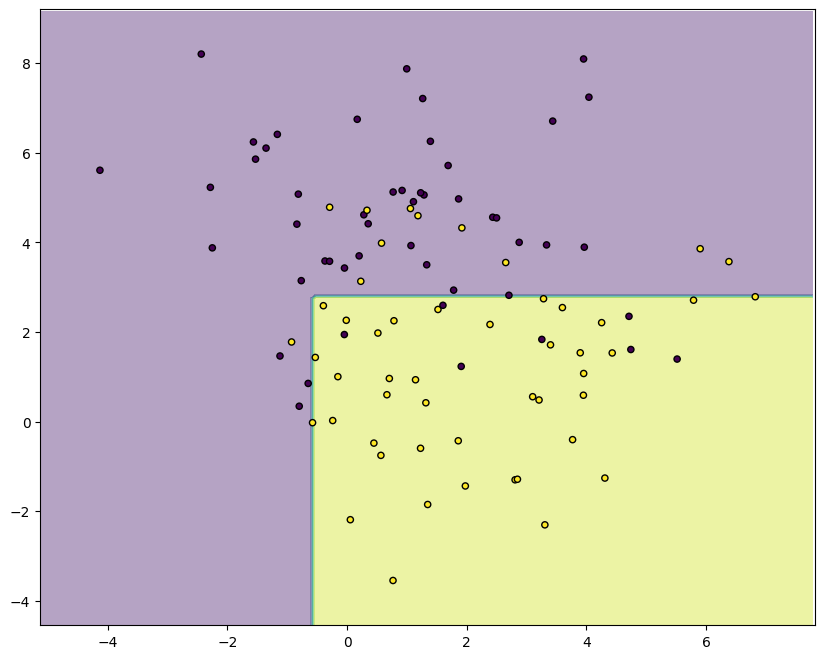

In [81]:
fig, ax = plt.subplots(sharex="col",sharey="row",figsize=(10,8))
ax.contourf(xx,yy,Z,alpha=0.4)
ax.scatter(x[:,0],x[:,1],c=y,s=20,edgecolors="k")
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
plt.show()

[Text(0.5, 0.8333333333333334, 'x[1] <= 2.803\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.25, 0.5, 'x[0] <= -0.613\ngini = 0.32\nsamples = 50\nvalue = [10, 40]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.258\nsamples = 46\nvalue = [7, 39]'),
 Text(0.75, 0.5, 'x[1] <= 4.847\ngini = 0.32\nsamples = 50\nvalue = [40, 10]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.459\nsamples = 28\nvalue = [18, 10]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]')]

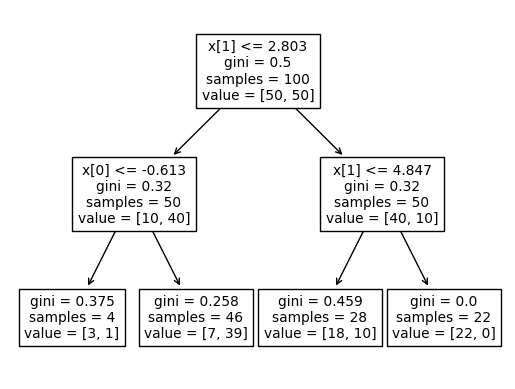

In [82]:
tree.plot_tree(tree_clf)

### DecisionTreee Regressor

In [83]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
x = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(x).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))# a cada 5 pontos criamos um ruido

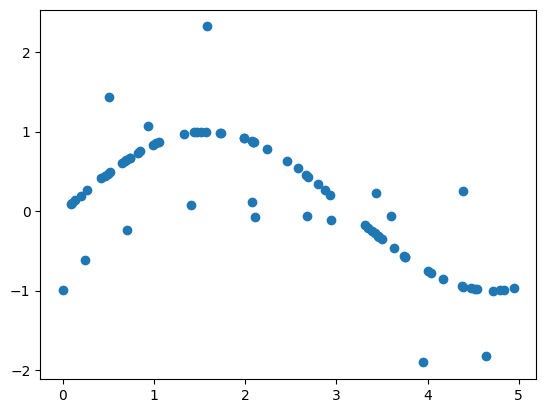

In [84]:
plt.scatter(x, y)

In [85]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x, y)
regr_2.fit(x, y)

DecisionTreeRegressor(max_depth=5)

[Text(0.49375, 0.9166666666666666, 'x[0] <= 2.94\nsquared_error = 0.601\nsamples = 80\nvalue = 0.122'),
 Text(0.21875, 0.75, 'x[0] <= 0.346\nsquared_error = 0.266\nsamples = 50\nvalue = 0.576'),
 Text(0.075, 0.5833333333333334, 'x[0] <= 0.046\nsquared_error = 0.203\nsamples = 7\nvalue = -0.119'),
 Text(0.05, 0.4166666666666667, 'squared_error = 0.0\nsamples = 1\nvalue = -0.994'),
 Text(0.1, 0.4166666666666667, 'x[0] <= 0.223\nsquared_error = 0.087\nsamples = 6\nvalue = 0.027'),
 Text(0.05, 0.25, 'x[0] <= 0.166\nsquared_error = 0.002\nsamples = 4\nvalue = 0.13'),
 Text(0.025, 0.08333333333333333, 'squared_error = 0.0\nsamples = 3\nvalue = 0.108'),
 Text(0.075, 0.08333333333333333, 'squared_error = -0.0\nsamples = 1\nvalue = 0.194'),
 Text(0.15, 0.25, 'x[0] <= 0.258\nsquared_error = 0.196\nsamples = 2\nvalue = -0.179'),
 Text(0.125, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = -0.621'),
 Text(0.175, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 0.264'

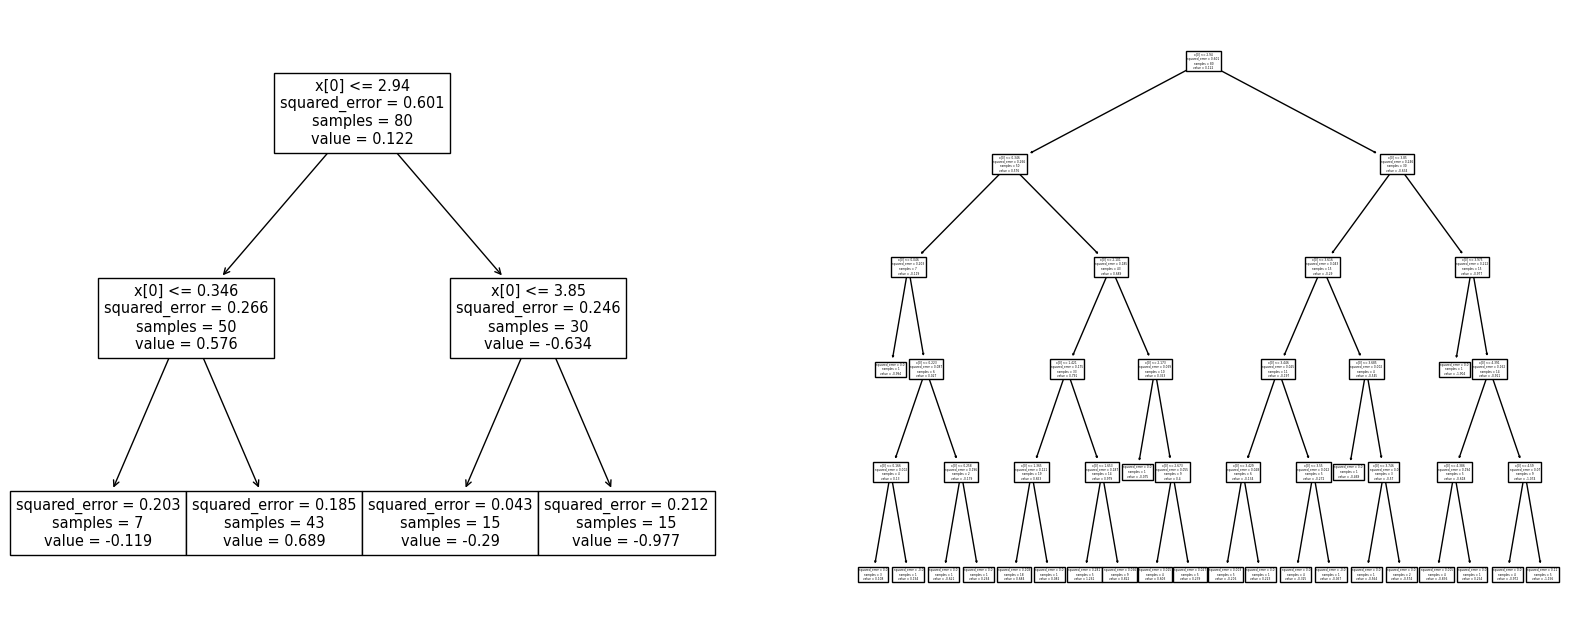

In [86]:
fig, ax = plt.subplots(1,2,figsize=(20, 8))
tree.plot_tree(regr_1,ax = ax[0])
tree.plot_tree(regr_2,ax = ax[1])

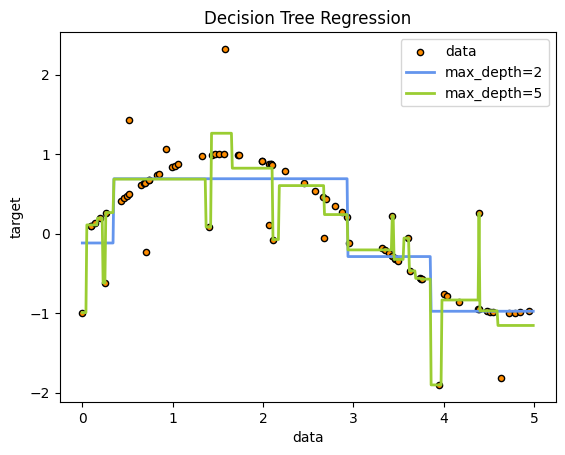

In [87]:
# Predict
x_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]##criando novo aixo com valores de 0-5 de o,o1 em o,o1
## previsões
y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)

# Plot the results
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(x_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(x_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Ensemble Learning

In [88]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
x = breast_cancer.data[:, 3:5] # petal length and width
y = breast_cancer.target

#### Explorando

In [89]:
breast_cancer["data"].shape# 569 tipos de tumor e 30 parametros

(569, 30)

In [90]:
breast_cancer.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [91]:
breast_cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [92]:
breast_cancer["data"][0]# vendo as informações acima do caso 1 do banco de dados

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [93]:
breast_cancer["target"][0]# esse caso era cancer benigno

0

In [94]:
breast_cancer["target"], breast_cancer["target_names"]# vendo todos os resultados e as categorias

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [101]:
x= breast_cancer.data[:,3:5]
y= breast_cancer["target"]

In [102]:
from sklearn.model_selection import train_test_split


In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # modelo


In [105]:

log_clf = LogisticRegression()
tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(# votação interna
    estimators=[('lr', log_clf), ('tree', tree_clf), ('svc', svm_clf)],
    voting='hard')# processo de votação é pela maioria dos votos
voting_clf.fit(x_train, y_train)# modelo treinado utilizando a combinação dos outros

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('tree', DecisionTreeClassifier()),
                             ('svc', SVC())])

In [106]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, tree_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9005847953216374
DecisionTreeClassifier 0.8947368421052632
SVC 0.8713450292397661
VotingClassifier 0.9005847953216374


### Random Forests

In [108]:
x= breast_cancer.data[:,0:2]
y= breast_cancer["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [115]:
from sklearn.ensemble import BaggingClassifier
# diferença entre o VotingClassifier BaggingClassifier
# VotingClassifier - multiplos modelos
# BaggingClassifier - multiplas instancias do mesmo modelo apresentadas a dados diferentes
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators= 500, # criando muitas pequenas arvores (500)
    max_samples=100, # cada arvore usara 100 dados de treino aleatorios
    bootstrap  = True # esses sem valores podem ser repetidos mas combinados com outros parametros
)

tree_clf = DecisionTreeClassifier(max_depth=40)
bag_clf.fit(x_train,y_train)
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=40)

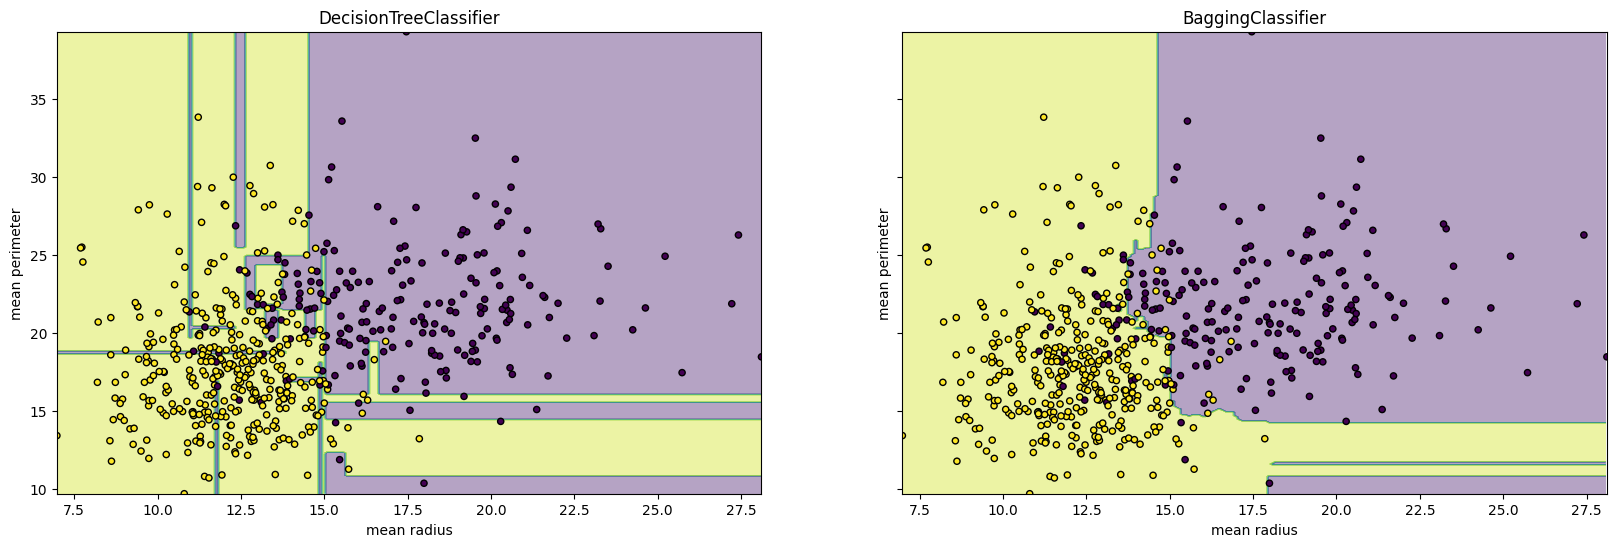

In [123]:
# Plotting decision regions
x_min, x_max = x[:, 0].min(), x[:, 0].max()
y_min, y_max = x[:, 1].min(), x[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(1,2,sharex="col", sharey="row", figsize=(20,6))

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax[0].contourf(xx, yy, Z, alpha=0.4)
ax[0].scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor="k")

ax[0].set_title('DecisionTreeClassifier')
ax[0].set_xlim([x_min, x_max])
ax[0].set_ylim([y_min, y_max])
ax[0].set_xlabel(breast_cancer["feature_names"][0])
ax[0].set_ylabel(breast_cancer["feature_names"][2])

####################################################################################################################################################################
Z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax[1].contourf(xx, yy, Z, alpha=0.4)
ax[1].scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor="k")

ax[1].set_title('BaggingClassifier')
ax[1].set_xlim([x_min, x_max])
ax[1].set_ylim([y_min, y_max])
ax[1].set_xlabel(breast_cancer["feature_names"][0])
ax[1].set_ylabel(breast_cancer["feature_names"][2])

plt.show()

In [124]:
for clf in [tree_clf, bag_clf]:
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test, y_pred))

0.8888888888888888
0.9239766081871345


bag_clf - menos overfiting que tree_clf

In [125]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=16,)


rnd_clf.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=1000)

#############################################################################################################################################

In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
tree_clf = DecisionTreeClassifier(max_depth=40)

bag_clf.fit(x_train, y_train)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=40)

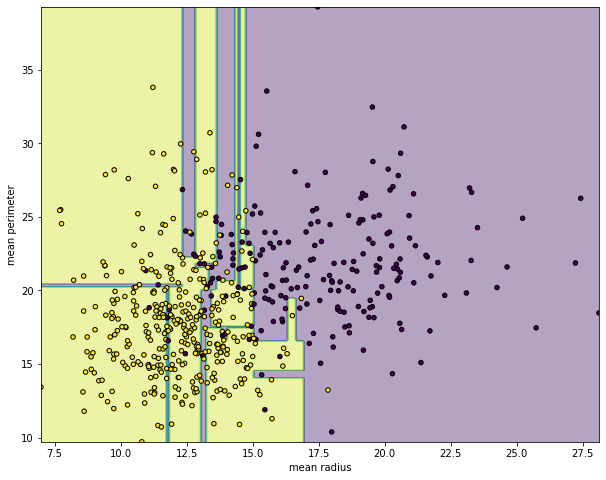

In [252]:
# Plotting decision regions
x_min, x_max = x[:, 0].min(), x[:, 0].max()
y_min, y_max = x[:, 1].min(), x[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor="k")

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel(breast_cancer["feature_names"][0])
ax.set_ylabel(breast_cancer["feature_names"][2])

plt.show()

In [ ]:
for clf in [tree_clf, bag_clf]:
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test, y_pred))

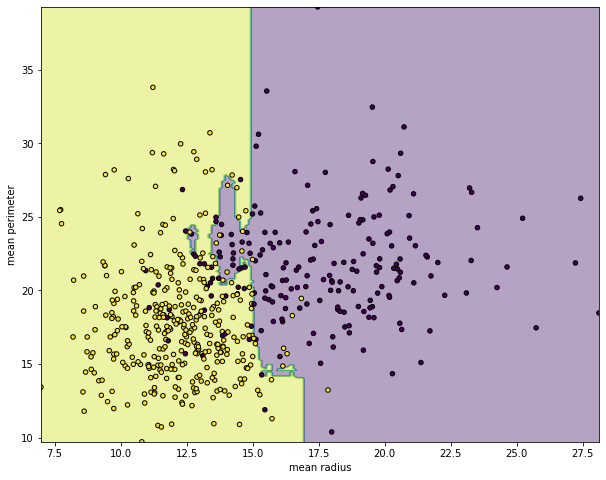

In [253]:
# Plotting decision regions
x_min, x_max = x[:, 0].min(), x[:, 0].max()
y_min, y_max = x[:, 1].min(), x[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor="k")

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel(breast_cancer["feature_names"][0])
ax.set_ylabel(breast_cancer["feature_names"][2])

plt.show()

In [258]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=16)
rnd_clf.fit(x_train, y_train)

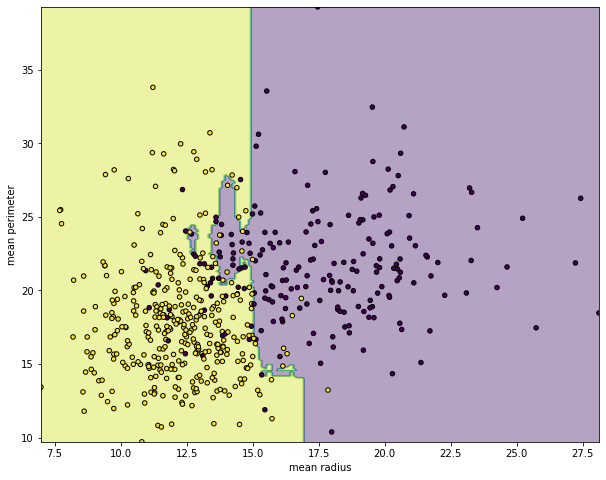

In [259]:
# Plotting decision regions
x_min, x_max = x[:, 0].min(), x[:, 0].max()
y_min, y_max = x[:, 1].min(), x[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor="k")

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel(breast_cancer["feature_names"][0])
ax.set_ylabel(breast_cancer["feature_names"][2])

plt.show()

### Feature importance

ver como cada arvore influenciou o modelo final

In [126]:
breast_cancer = load_breast_cancer()
x = breast_cancer.data 
y = breast_cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [127]:
from sklearn.ensemble import RandomForestClassifier


# parametros 
# criterion criterio de seleção das arvores
# min_samples_split minimo de separações de amostras
# max features quais features serão selecionadas
# quantidade de nós


rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=16)
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=1000)

In [131]:
rnd_clf.feature_importances_, breast_cancer["feature_names"]

(array([0.04016893, 0.01590095, 0.05831384, 0.05318037, 0.00606588,
        0.01194188, 0.04214442, 0.09120041, 0.00466691, 0.00417499,
        0.01407539, 0.00351053, 0.01588429, 0.03675639, 0.00506857,
        0.00373614, 0.00611998, 0.00536277, 0.00425839, 0.00512712,
        0.11396579, 0.01637389, 0.13751242, 0.11570286, 0.01051905,
        0.01293981, 0.04546223, 0.10364826, 0.00977929, 0.00643822]),
 array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst conca

<Axes: >

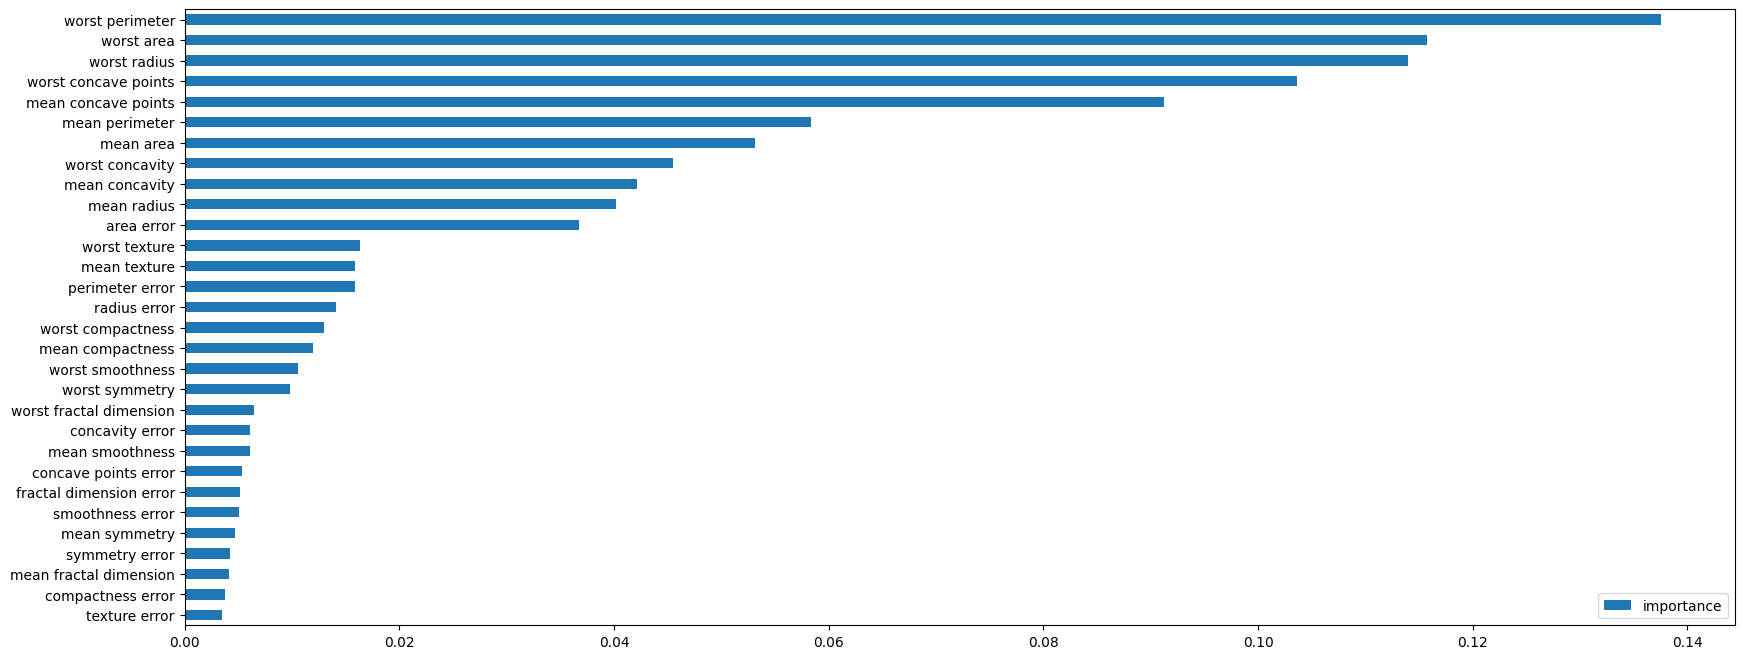

In [128]:
feature_importances = pd.DataFrame(rnd_clf.feature_importances_,
                                   index = breast_cancer["feature_names"],
                                    columns=['importance']).sort_values('importance', ascending=True)

fig, ax = plt.subplots(figsize=(20, 8))
feature_importances.plot(kind="barh", ax=ax)